In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('/Users/elizbr/Downloads/lastfm_train/df1.csv', header =0, )

In [3]:
df = df.sample(20000)

In [4]:
type(df.tags.iloc[2])

str

In [5]:
similars = df.similars.to_list()

In [6]:
df = df[ df.astype(str)['tags'] != '[]' ]
df

,Unnamed: 0,artist,timestamp,similars,tags,track_id,title
70530,70530,Caetano Veloso,2011-08-10 11:20:56.295466,"[['TRYNMZY12903CA8E1E', 0.541769], ['TRXNTAD12...","[['tropicalia', '100'], ['mpb', '100'], ['ener...",TRJZGTA128F9312D1F,A Luz De Tieta
50410,50410,The Pretenders,2011-08-11 06:36:45.175755,[],"[['rock', '100'], ['acoustic', '100'], ['indie...",TRODUVR128F92E2329,Nothing Breaks Like a Heart
132834,132834,Ultrabeat,2011-08-03 15:03:28.354306,"[['TRKTBLX128F428412B', 0.90692], ['TRZBKSJ128...","[['jytakampaa', '100'], ['aerodance', '100'], ...",TRVNTSO128F4284128,1000 Kisses
177084,177084,Holy Fuck,2011-08-08 16:05:11.997170,"[['TRBFCSM128F42629F1', 1], ['TRDZTKM128F42629...","[['experimental', '100'], ['alternative', '60'...",TRXJUGX128F42629F8,Bontempi Latin
58690,58690,Arcadia,2011-08-04 07:03:34.630701,"[['TRNQLBS128F14571A9', 1], ['TRDLWLL128F14571...","[['80s', '100'], ['new wave', '60'], ['sting',...",TROKVJE128F14571A8,The Promise
...,...,...,...,...,...,...,...
169069,169069,ATB,2011-08-15 11:43:14.442246,"[['TRRDUAO128F14A03E2', 0.896112], ['TRRRTTF12...","[['trance', '100'], ['dance', '36'], ['chillou...",TRXTCJX128F14A03D7,Gentle Melody
18709,18709,Leon Russell,2011-08-16 01:20:24.691574,"[['TRGBOGS128F92C1E7C', 0.932304], ['TREUSOF12...","[['rock', '100'], ['singer-songwriter', '72'],...",TRSDNCP128F92FAACA,Stranger In A Strange Land
113147,113147,Big Sugar,2011-08-04 22:25:03.454069,"[['TRQDZOA128F1467F9F', 0.135547], ['TRBLFCI12...","[['rock', '100'], ['Canadian', '66'], ['blues'...",TRDJFUW12903CE4271,Dear Mr. Fantasy
47945,47945,Lorez Alexandria,2011-08-01 14:43:12.453855,"[['TRDPDRG128F9316A63', 1], ['TRDBZWP128F9316A...","[['jazz', '100'], ['jazz vocal', '100'], ['Blu...",TROJRHA128F9316A67,Angel Eyes


In [8]:
df.to_csv('sampler_671.csv')

In [7]:
import ast 
list_tags = []

for index, row in df.iterrows():
    f = ast.literal_eval(row.tags)
    for x in f:
        list_tags.append(x[0])
    row.tags = f

In [8]:
from collections import Counter 
  
occurence_count = Counter(list_tags) 
occurence_count.most_common(20)

[('rock', 2113),
 ('pop', 1389),
 ('alternative', 1194),
 ('electronic', 1021),
 ('indie', 1011),
 ('female vocalists', 872),
 ('favorites', 844),
 ('Love', 739),
 ('dance', 728),
 ('beautiful', 655),
 ('alternative rock', 648),
 ('00s', 605),
 ('chillout', 600),
 ('jazz', 600),
 ('singer-songwriter', 584),
 ('male vocalists', 575),
 ('metal', 564),
 ('classic rock', 562),
 ('Awesome', 554),
 ('Mellow', 552)]

In [9]:
# creating a list with the keys 
items = Counter(list_tags).keys() 
print("No of unique items in the list are:", len(items)) 

No of unique items in the list are: 56191


In [10]:
type(df.tags.iloc[0])

str

In [12]:
## network 

# create from, to node df 
nodes = pd.DataFrame(columns = ['from_node', 'to_node', 'weight'])

In [13]:
adds = []
for index, row in df.iterrows():
    fromN = row.track_id
    f = ast.literal_eval(row.similars)
    for x in f:
        toN = x[0]
        wght = x[1]
        instance_dict = {
            'from_node': fromN,
            'to_node': toN,
            'weight': wght
        }
        adds.append(instance_dict)
        
r = pd.DataFrame(adds)        

In [33]:
high_weight_r = r[ r.weight >= .95]
high_weight_r

,from_node,to_node,weight
0,TRVNZTW128F421D41B,TRHACXA128F421D405,1.0
77,TRSZMTS128F4264B4A,TRNFZLZ128F4263CDC,1.0
202,TRSCMLN128F4266361,TRPNXMF128F4266362,1.0
233,TRVVGUL128F92E7D34,TRAAMPA128F92E7D0D,1.0
352,TRSHHNK128F933A4FB,TRJUJSW128F933A4FF,1.0
...,...,...,...
906528,TRYTKQE128F42ADA50,TRNHCIP128F42ADA54,1.0
906767,TRXQWJI128F427AEB6,TRZRQPV128F427AEB7,1.0
906841,TRXIYDI128F9329837,TREDMEH128F933B1D2,1.0
906911,TRVKUWS128F4266115,TRFFLQD128EF34AE3F,1.0


In [15]:
r.from_node.value_counts()

TRXBVYS128F92F993F    670
TRYYDSC12903CC9D3A    624
TRDFUHN128F92F14A5    606
TRDWJAL128F92D7DD4    594
TRVEXUH128F92F5663    581
                     ... 
TRKNZKP128F931AFBE      1
TRKBFVB128F145B21D      1
TRSCTSE12903CA1FF0      1
TRKDCCP128F930DC55      1
TROLEMG128F932A52A      1
Name: from_node, Length: 8455, dtype: int64

In [16]:
r.to_node.value_counts()

TRXNXOG12903CFAE0A    71
TRKDWET12903CCB8A6    71
TRFQGDR12903CE514A    71
TRDJEDE12903CE5187    71
TRMAVMJ12903CCB8AC    71
                      ..
TRWXLCG128F422028E     1
TRPFIJS128F92F40CB     1
TRSQJUN128F930A91E     1
TRRDJAO128F149865F     1
TRTIGPZ12903CB5576     1
Name: to_node, Length: 272063, dtype: int64

In [17]:
r.weight.value_counts()

1.000000    7713
0.001146      63
0.010255      60
0.425070      60
0.006197      56
            ... 
0.038420       1
0.224463       1
0.000532       1
0.019528       1
0.088609       1
Name: weight, Length: 537263, dtype: int64

In [24]:
r.weight.mean()

0.09222512400997607

In [21]:
import pandas as pd 
import numpy as np 
import sklearn as skl
import networkx as nx
import matplotlib.pyplot as plt

In [25]:

#G = nx.read_edgelist("test.edgelist", nodetype=int, data=(("weight", float),))
G = nx.from_pandas_edgelist(r, 'from_node', 'to_node') # data=(("weight", float),))


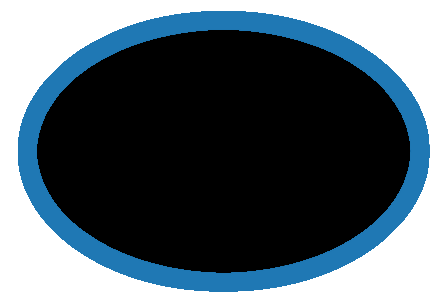

In [26]:

from matplotlib.pyplot import figure
nx.draw_shell(G, with_labels=False)

In [50]:
graph = nx.from_pandas_edgelist(high_weight_r, 'from_node', 'to_node')


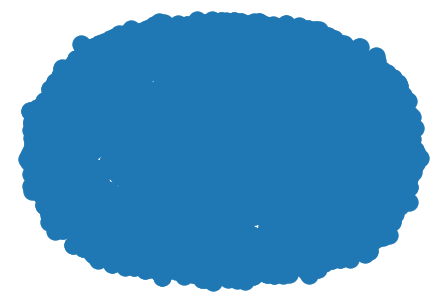

In [37]:
# Draw graph
pos = nx.spring_layout(G)
options = {
    "node_color": "blue",
    "node_size": 2,
    "edge_color": "grey",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(G, pos)

In [52]:
 from matplotlib import pylab
 import networkx as nx

 def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(graph,"my_graph.pdf")

#it can also be saved in .svg, .png. or .ps formats

In [40]:
from operator import itemgetter


In [41]:
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

In [42]:
# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

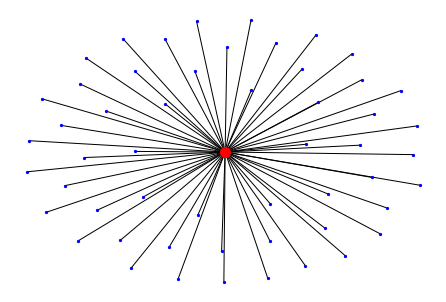

In [44]:
# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=5, with_labels=False)

# Draw ego as large and red
options = {"node_size": 100, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

In [45]:
import math

import matplotlib.pyplot as plt
import networkx as nx

# This example needs Graphviz and either PyGraphviz or pydot.
# from networkx.drawing.nx_pydot import graphviz_layout as layout
from networkx.drawing.nx_agraph import graphviz_layout as layout

# If you don't have pygraphviz or pydot, you can do this
# layout = nx.spring_layout

In [46]:

n = 150  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / float(n)

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]


In [47]:
region = 220  # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)


<Figure size 432x288 with 0 Axes>

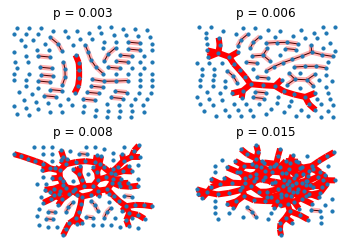

In [48]:
for p in pvals:
    G = nx.binomial_graph(n, p)
    pos = layout(G)
    region += 1
    plt.subplot(region)
    plt.title(f"p = {p:.3f}")
    nx.draw(G, pos, with_labels=False, node_size=10)
    # identify largest connected component
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    nx.draw_networkx_edges(G0, pos, edge_color="r", width=6.0)
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(
                G.subgraph(Gi), pos, edge_color="r", alpha=0.3, width=5.0,
            )
plt.show()